In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 모델 튜닝 - 하이퍼파라미터 튜닝

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, test_size=0.2, 
                                                    random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9035087719298246

In [4]:
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9035087719298246

### 검증세트 활용

In [5]:
cancer = load_breast_cancer()

X_train_all, X_test, y_train_all, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=42)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [7]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.5526315789473685

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# k-Fold : k - cv(5개분할)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
logistic = LogisticRegression(random_state=42)

scores = cross_val_score(logistic, X, y)
scores

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.93684211, 0.96842105, 0.94179894])

In [9]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.95


In [10]:
# 다중평가지표 : cross_validate(), 분할마다 훈련과 테스트에 걸린 시간과
# 설정에 따라 훈련데이터와 테스트데이터의 점수도 얻을 수 있다.
from sklearn.model_selection import cross_validate
res = cross_validate(logistic, X, y, return_train_score=True)
res

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'fit_time': array([0.00500154, 0.00399399, 0.00399947]),
 'score_time': array([0.0010016, 0.       , 0.       ]),
 'test_score': array([0.93684211, 0.96842105, 0.94179894]),
 'train_score': array([0.96569921, 0.94986807, 0.96842105])}

In [11]:
import pandas as pd
import mglearn
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.005002,0.001002,0.936842,0.965699
1,0.003994,0.000000,0.968421,0.949868
2,0.003999,0.000000,0.941799,0.968421


평균 시간과 점수 : 
 fit_time       0.004332
score_time     0.000334
test_score     0.949021
train_score    0.961329
dtype: float64


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
scores = cross_val_score(logistic, X, y, cv=3)
scores

array([0.93684211, 0.96842105, 0.94179894])

In [14]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.95


### 일반화, 과대적합, 과소적합

X.shape :(26, 2)


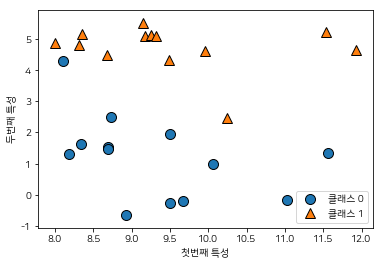

In [15]:
X, y= mglearn.datasets.make_forge()

# 산점도 그래프
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape :{}'.format(X.shape))

### Knn(k-최근접 이웃)
- 가장 간단한 머신러닝 알고리즘
- 훈련데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다.
- 훈련 데이터 샘플 하나를 최근접 이웃으로 찾아 예측에 사용한다.

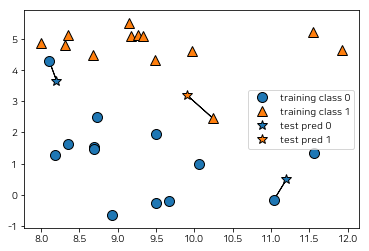

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

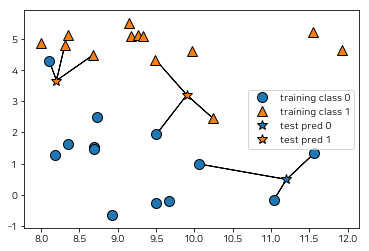

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
# train과 test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
print('테스트 데이터 예측 : {}'.format(clf.predict(X_test)))

테스트 데이터 예측 : [1 0 1 0 1 0 0]


In [22]:
print('테스트 데이터 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 데이터 정확도 : 0.86


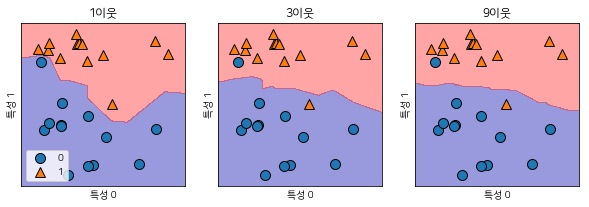

In [23]:
# 결정 경계(decision boundary) : 각각의 클래스로 지정한 영역을 나누는 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 이웃의 수 1, 3, 9
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)


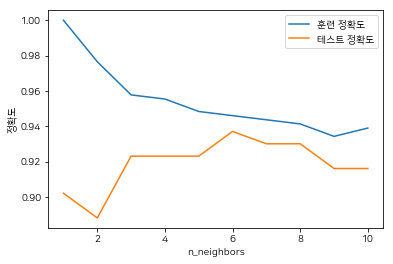

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_setting=range(1, 11)

for n_neighbors in neighbors_setting:
    # 모델생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련데이터 정확도
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.0.0'

### 난수생성

In [27]:
# 균일분포(uniform) : 최소값과 최대값 사이의 모든 수가 나올 확률이 동일
# 정규분포(normal) : 평균과 표준편차
rand = tf.random.uniform([1], 0, 1)  # shape, 최소값, 최대값
rand

<tf.Tensor: id=6, shape=(1,), dtype=float32, numpy=array([0.51840186], dtype=float32)>

In [28]:
rand = tf.random.normal([1], 0, 1) # shape, 평균, 표준편차
rand

<tf.Tensor: id=12, shape=(1,), dtype=float32, numpy=array([0.42614952], dtype=float32)>

In [29]:
rand = tf.random.uniform([4], 0, 1)
rand

<tf.Tensor: id=19, shape=(4,), dtype=float32, numpy=array([0.8555113 , 0.7630832 , 0.02511799, 0.54378796], dtype=float32)>

In [30]:
rand = tf.random.normal([4], 0, 1)
rand

<tf.Tensor: id=25, shape=(4,), dtype=float32, numpy=array([ 0.28332412, -0.5465418 ,  2.2054062 , -0.13902758], dtype=float32)>

### 뉴런 - 로지스틱 회귀모형

In [31]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [32]:
# y = ax+b
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
output

0.26269685690615435

In [33]:
# 경사하강법 : w에 입력과 학습률과 에러를 곱한 값을 더해주는 것
# 학습률을 w 업데이트한다.
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.08085982643400717 0.08085982643400717
199 -0.0458891922077471 0.0458891922077471
299 -0.03181766368492115 0.03181766368492115
399 -0.024292474511376647 0.024292474511376647
499 -0.01962420610792843 0.01962420610792843
599 -0.016450961118240577 0.016450961118240577
699 -0.014155953402259606 0.014155953402259606
799 -0.012419942087342236 0.012419942087342236
899 -0.011061451485534501 0.011061451485534501
999 -0.009969666985878577 0.009969666985878577


In [34]:
# 만약, 입력값이 0이 들어오고, 출력으로 1을 얻는 신경망을 생성한다면?
# 편향(bias) = 절편, 보편적으로 1을 사용


### k-NN 최근접 이웃 알고리즘의 회귀문제

Text(0, 0.5, '타겟')

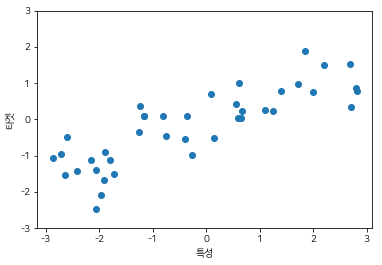

In [35]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')

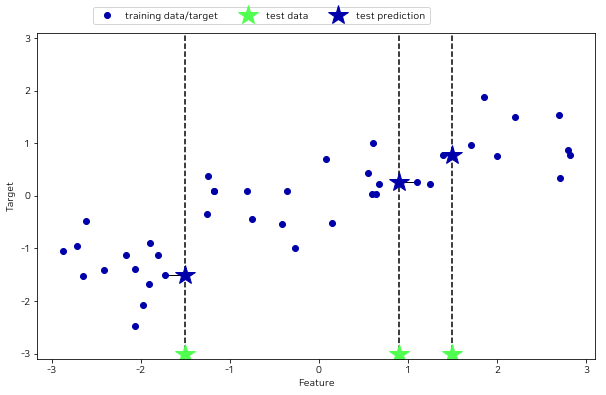

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

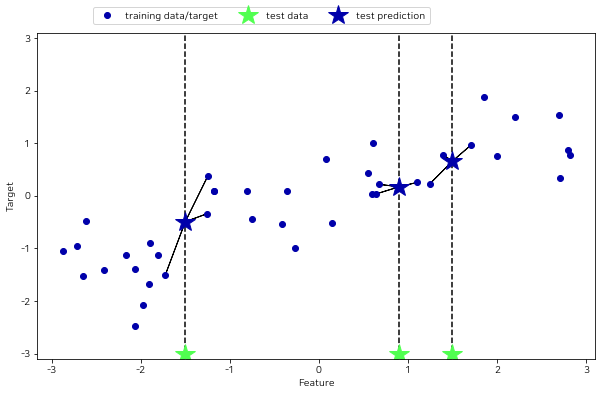

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [39]:
print('테스트 세트 예측 : \n', reg.predict(X_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [40]:
# R2(결정계수) = 설명계수
# R2 = 1 - (타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합
print('테스트 세트 R2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R2 : 0.83


### 선형모델

w[0]: 0.393906  b: -0.031804


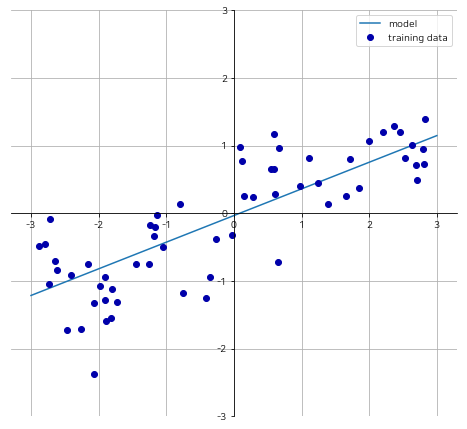

In [41]:
mglearn.plots.plot_linear_regression_wave()

In [42]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [43]:
# 기울기(w) 가중치(weight) 계수(coefficient) : lr.coef_
# 편향(bias, offset), 절편 : lr.intercept_
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [44]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.67
테스트 데이터의 점수 : 0.66


- R2값이 0.66이면 좋은 결과가 아니다.
- 훈련 세트와 테스트 세트의 점수가 매우 비슷하다. 이건 과대적합이 아니라 과소적합인 상태를 의미한다.
- 특성이 적은 선형 모델은 과대적합을 걱정할 필요는 없다. 단 특성이 많은 데이터셋에서 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다.

In [45]:
# 보스턴 주택가격 데이터셋, 1970년대 주택 평균 가격을 예측한 것이다.
from sklearn.datasets import load_boston
boston = load_boston()
print('boston.shape : {}'.format(boston.data.shape))

boston.shape : (506, 13)


In [46]:
# 특성 공학 : Feature Engineering
# 특성을 유도해내는 것을 말한다.
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [48]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.95
테스트 데이터의 점수 : 0.61


- 훈련데이터와 테스트데이터의 성능 차이는 모델이 과대적합되었다는 확실한 신호이다. 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
- 릿지 회귀(L2 규제-패널티, 평균제곱오차)와 라쏘 회귀(L1 규제-패널티, 기울기의 절대값)

In [49]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'훈련데이터의 점수 {ridge.score(X_train, y_train):.2f}')
print(f'테스트데이터의 점수 {ridge.score(X_test, y_test):.2f}')

훈련데이터의 점수 0.89
테스트데이터의 점수 0.75


In [50]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'훈련데이터의 점수 {ridge10.score(X_train, y_train):.2f}')
print(f'테스트데이터의 점수 {ridge10.score(X_test, y_test):.2f}')

훈련데이터의 점수 0.79
테스트데이터의 점수 0.64


In [51]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'훈련데이터의 점수 {ridge01.score(X_train, y_train):.2f}')
print(f'테스트데이터의 점수 {ridge01.score(X_test, y_test):.2f}')

훈련데이터의 점수 0.93
테스트데이터의 점수 0.77


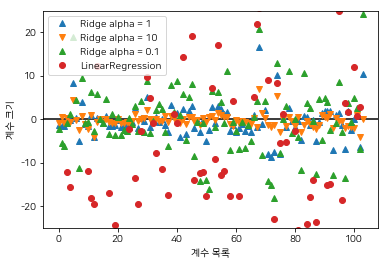

In [52]:
plt.plot(ridge.coef_, '^', label='Ridge alpha = 1')
plt.plot(ridge10.coef_, 'v', label='Ridge alpha = 10')
plt.plot(ridge01.coef_, '^', label='Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

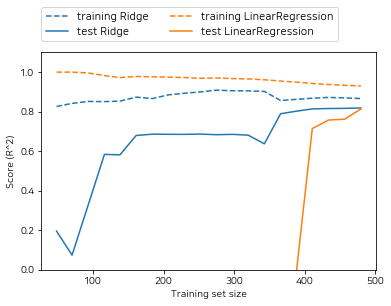

In [56]:
# 학습곡선(learning curve) : 훈련과정을 여러번 반복하면서 학습한 알고리즙에서 
# 반복횟수에 따른 성능 변화를 보여주는 그래프
mglearn.plots.plot_ridge_n_samples()

데이터가 충분히 있다면,, 상관이없어보임

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- 훈련데이터와 테스트데이터 모두의 결과가 좋지 않다.
- 이것은 과소적합이며 104개의 특성 중 4개만 사용한 것
- Lasso도 계수를 얼마나 강하게 0으로 보낼 지를 조절하는 apha 매개변수
- Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷 방식에서 L2 규제가 빠진 것이며, Lasso의 alpha 매개변수 R은 엘라스틱넷 패키지인 glmnet의 lambda 매개변수와 같은 의미

In [58]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [59]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, '계수 크기')

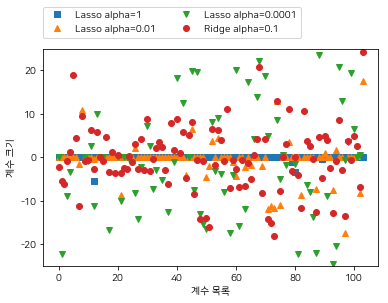

In [61]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

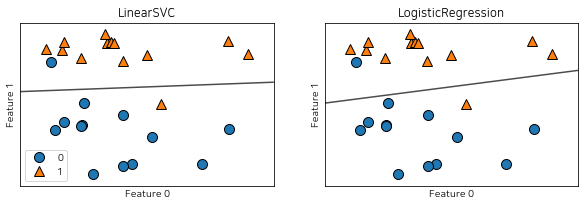

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()

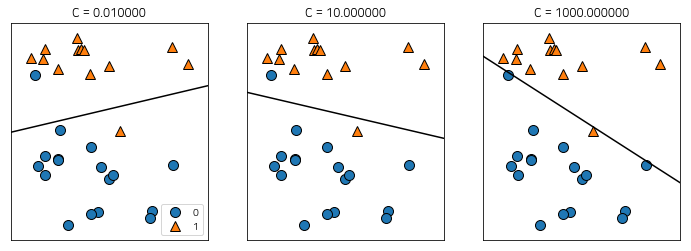

In [63]:
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 C값이 가장 낮다 (데이터 포인트 중 다수에 맞추려는 성질)
- C값이 작으면 규제가 많이 적용된 것 = 경계선이 수평에 가깝다
- 중간 그림은 c값이 왼쪽보다 조금 크다 
    - 각각의 데이터 샘플을 정확히 분류하려는 노력
    - 클래스 1은 완벽히 분류했지만 여전히 잘못 분류된 샘플 존재
- 두 클래스의 결정경계선에 의한 면적이 차이가 크다(과대적합 의심)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [65]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [66]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


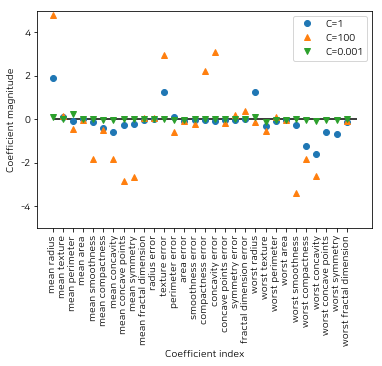

In [67]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


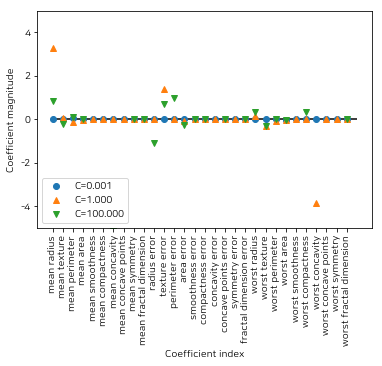

In [68]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)